# Uwalaka Chiagozie HW7 

Part 2: Create a binary classification problem using sklearn.datasets.make moons. Build
a SVM classifier model and investigate the effect of hyper-parameters C, γ, and kernels on
the model performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_moons

from mlxtend.plotting import plot_decision_regions

In [2]:
# Create a binary classification dataset with make_moons
X, y = make_moons(n_samples=100, noise=0.3, random_state=42) # noise parameter adds random noise to the data points to make it more challenging.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = SVC(kernel="linear", C=.1000)
model.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear')

In [48]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8285714285714286

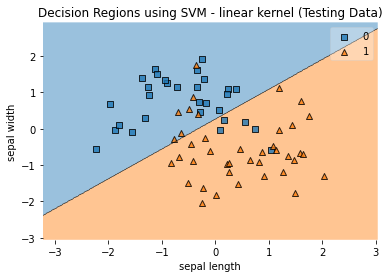

In [49]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Testing Data)');

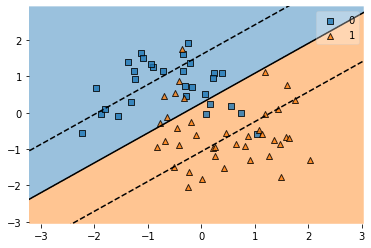

In [50]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

In [53]:
C_values = [0.01, 0.01, 0.1, 1, 10, 100]
accuracy_scores_C = []
kernel=['linear', 'poly', 'rbf', 'sigmoid'] 
gamma=['scale', 'auto']
for kernel in kernel:
    for C in C_values:
        model = SVC(kernel=kernel, C=C, gamma="auto")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores_C.append(accuracy)
        print(f"SVC (Kernel={kernel}, C={C}) - Accuracy: {accuracy:.2f}")

SVC (Kernel=linear, C=0.01) - Accuracy: 0.33
SVC (Kernel=linear, C=0.01) - Accuracy: 0.33
SVC (Kernel=linear, C=0.1) - Accuracy: 0.90
SVC (Kernel=linear, C=1) - Accuracy: 0.87
SVC (Kernel=linear, C=10) - Accuracy: 0.83
SVC (Kernel=linear, C=100) - Accuracy: 0.83
SVC (Kernel=poly, C=0.01) - Accuracy: 0.33
SVC (Kernel=poly, C=0.01) - Accuracy: 0.33
SVC (Kernel=poly, C=0.1) - Accuracy: 0.83
SVC (Kernel=poly, C=1) - Accuracy: 0.83
SVC (Kernel=poly, C=10) - Accuracy: 0.77
SVC (Kernel=poly, C=100) - Accuracy: 0.80
SVC (Kernel=rbf, C=0.01) - Accuracy: 0.33
SVC (Kernel=rbf, C=0.01) - Accuracy: 0.33
SVC (Kernel=rbf, C=0.1) - Accuracy: 0.80
SVC (Kernel=rbf, C=1) - Accuracy: 0.87
SVC (Kernel=rbf, C=10) - Accuracy: 0.87
SVC (Kernel=rbf, C=100) - Accuracy: 0.77
SVC (Kernel=sigmoid, C=0.01) - Accuracy: 0.33
SVC (Kernel=sigmoid, C=0.01) - Accuracy: 0.33
SVC (Kernel=sigmoid, C=0.1) - Accuracy: 0.87
SVC (Kernel=sigmoid, C=1) - Accuracy: 0.73
SVC (Kernel=sigmoid, C=10) - Accuracy: 0.73
SVC (Kernel=sigmo